## Открытый курс по машинному обучению. Сессия № 2

Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы**

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
#монтируем Google диск 
from google.colab import drive
drive.mount ('/content/drive') 

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [5]:
#Надо залить файл с данными на Google диск, щелкнуть на значок папки слева, найти файл, через контекстное меню скопировать путь и вставить сюда
data = pd.read_csv('./titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [ ]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [ ]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [ ]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [ ]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [ ]:
age_categories = [age_category(age) for age in data.Age]

In [ ]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [ ]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [48]:
M= data[data['Sex'] == 'male'].shape[0]
W= data[data['Sex'] == 'female'].shape[0]
print(str(M) + " мужчин и " + str(W) + " женщин")

577 мужчин и 314 женщин


**2. Выведите распределение переменной `Pclass` и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин во 2-м классе?**
- 104
- 108
- 112
- 125

108


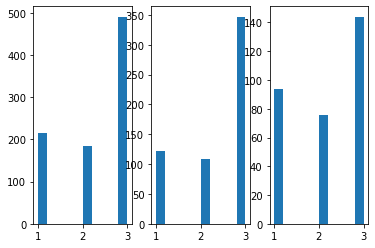

In [49]:
import matplotlib.pyplot as plt
a,b = plt.subplots(nrows= 1 , ncols= 3 )
b[0].hist(data['Pclass'])
b[1].hist(data[data['Sex'] == 'male'].Pclass)
b[2].hist(data[data['Sex'] == 'female'].Pclass)
M = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].shape[0]
print(str(M))

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [35]:
N_young = data[(data['Age'] < 30)].shape[0]
N_old = data[(data['Age'] > 60)].shape[0]
N_young_save = data[(data['Age'] < 30) & (data['Survived'] == 1)].shape[0]
N_old_save = data[(data['Age'] > 60) & (data['Survived'] == 1)].shape[0]
Y = (N_young_save * 100)/N_young
O = (N_old_save * 100)/N_old
print(str(round(Y,1)) + "% среди молодых и " + str(round(O,1)) + "% среди старых")

40.6% среди молодых и 22.7% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [51]:
N_M = data[(data['Sex'] == 'male')].shape[0]
N_W = data[(data['Sex'] == 'female')].shape[0]
N_M_save = data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]
N_W_save = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]
M1 = (N_M_save * 100)/N_M
W1 = (N_W_save * 100)/N_W
print(str(round(M1,1)) + "% среди мужчин и " + str(round(W1,1)) + "% среди женщин")

18.9% среди мужчин и 74.2% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [86]:
def Name(name):
    arr = name.split()
    return arr[len(arr) - 1]
names = [Name(name) for name in data.Name]
data['Names'] = names
data['Ones'] = np.ones(data.shape[0])
(data[data['Sex'] == 'male'].groupby('Names')['Ones'].sum().sort_values(ascending = False)).idxmax ()


'John'

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

<AxesSubplot:title={'center':'Распределение стоимости билета у спасенных(синий) и погибших(черный)'}>

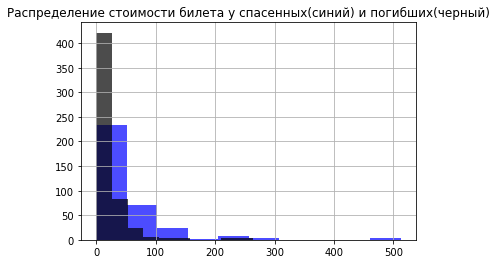

In [24]:
plt.title('Распределение стоимости билета у спасенных(синий) и погибших(черный)')
data[data['Survived'] == 1]['Fare'].hist(color="blue",alpha=.7)
data[data['Survived'] == 0]['Fare'].hist(color="black",alpha=.7)


                                         


средний возраст погибших выше


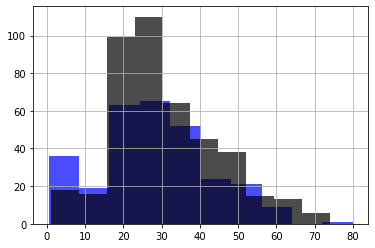

In [32]:
data[data['Survived'] == 1]['Age'].hist(color="blue",alpha=.7)
data[data['Survived'] == 0]['Age'].hist(color="black",alpha=.7)
print("средний возраст погибших выше")

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [44]:
M_1cl = data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Age'].mean()
print("Средний возраст мужчин 1 класса " + str(round(M_1cl,1)))
M_2cl = data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]['Age'].mean()
print("Средний возраст мужчин 2 класса " + str(round(M_2cl,1)))
M_3cl = data[(data['Pclass'] == 3) & (data['Sex'] == 'male')]['Age'].mean()
print("Средний возраст мужчин 2 класса " + str(round(M_3cl,1)))
W_1cl = data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Age'].mean()
print("Средний возраст женщин 1 класса " + str(round(W_1cl,1)))
W_2cl = data[(data['Pclass'] == 2) & (data['Sex'] == 'female')]['Age'].mean()
print("Средний возраст женщин 2 класса " + str(round(W_2cl,1)))
W_3cl = data[(data['Pclass'] == 3) & (data['Sex'] == 'female')]['Age'].mean()
print("Средний возраст женщин 3 класса " + str(round(W_3cl,1)))

Средний возраст мужчин 1 класса 41.3
Средний возраст мужчин 2 класса 30.7
Средний возраст мужчин 2 класса 26.5
Средний возраст женщин 1 класса 34.6
Средний возраст женщин 2 класса 28.7
Средний возраст женщин 3 класса 21.8
